## Programação orientada a arrays

Usar arrays NumPy permite expressar muitos tipos de tarefas de
processamento de dados como expressões concisas com arrays, o que de
outra forma demandaria a criação de loops.<span style="color: red"> **Essa prática de substituir loops
explícitos por expressões de arrays é chamada por algumas pessoas de
vetorização**. Em geral, as operações vetorizadas com arrays são
significativamente mais rápidas do que suas equivalentes em Python puro,
afetando com maior impacto qualquer tipo de computação numérica.</span>
Posteriormente, no Apêndice A, NumPy avançado, explicarei o broadcasting,
um método poderoso para a computação com vetorização.

Como um exemplo simples, suponhamos que quiséssemos **avaliar a função
sqrt(x^2 + y^2)** para uma grade regular de valores. A função **numpy.meshgrid recebe
dois arrays unidimensionais e produz duas matrizes bidimensionais
correspondentes a todos os pares (x, y)** dos dois arrays:

In [3]:
import numpy as np

points = np.arange(-5, 5, 0.01) # 100 pontos igualmente espaçados

xs, ys = np.meshgrid(points, points)

ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]],
      shape=(1000, 1000))

Para avaliar a função você só precisa escrever a mesma expressão que
escreveria com dois pontos:

In [5]:
z = np.sqrt(xs ** 2 + ys ** 2)

z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]], shape=(1000, 1000))

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

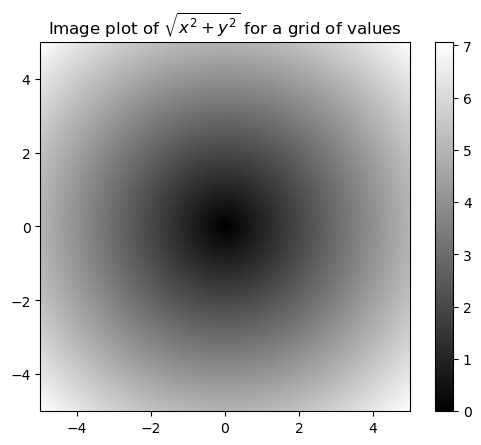

In [11]:
import matplotlib.pyplot as plt

plt.imshow(z, cmap=plt.cm.gray, extent=[-5, 5, -5, 5])
In [176]: plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")


<mark> O termo vetorização é usado para descrever alguns outros conceitos
da Ciência da Computação, mas **neste livro estou usando-o para
descrever operações com arrays de dados de tipo inteiro executadas de
uma só vez em ver de ser preciso percorrer valor por valor usando um
loop for do Pyhton.**</mark>

#### Expressão da lógica condicional como operações de vetores

A função **numpy.where é uma versão vetorizada da expressão ternária x if condition
else y.** Suponhamos que tivéssemos um array booleano e dois arrays de
valores:

In [12]:
import numpy as np

xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])

cond = np.array([True, False, True, True, False])

Digamos que quiséssemos pegar um valor de xarr sempre que o valor
correspondente de cond for True; caso contrário, pegaríamos o valor em yarr.
Uma list comprehension para isso poderia ser como a descrita a seguir:

In [14]:
result = [x if c else y for x, y, c in zip(xarr, yarr, cond)]

result

[np.float64(1.1),
 np.float64(2.2),
 np.float64(1.3),
 np.float64(1.4),
 np.float64(2.5)]

Esse código apresenta vários problemas. Em primeiro lugar, ele não será
muito rápido para arrays grandes (porque todo o trabalho está sendo feito em
código Python interpretado). Em segundo lugar, não funcionará com arrays
multidimensionais. Com numpy.where, podemos fazer isso com uma única
chamada de função:

In [15]:
result2 = np.where(cond, xarr, yarr)

result2

array([1.1, 2.2, 1.3, 1.4, 2.5])

O segundo e o terceiro argumentos de numpy.where não precisam ser arrays; um
deles ou ambos podem ser escalares. Um uso típico de where em análise de
dados é para a produção de um novo array de valores baseado em outro array.
Suponhamos que você tivesse uma matriz de dados gerados aleatoriamente e
quisesse substituir todos os valores positivos por 2 e todos os valores
negativos por -2. É possível fazer isso com numpy.where:

In [16]:
rng = np.random.default_rng(seed=1234)
arr = rng.standard_normal((4, 4))
arr

array([[-1.60383681,  0.06409991,  0.7408913 ,  0.15261919],
       [ 0.86374389,  2.91309922, -1.47882336,  0.94547297],
       [-1.66613546,  0.34374458, -0.51244371,  1.32375896],
       [-0.86028019,  0.5194932 , -1.26514372, -2.15913901]])

In [17]:
arr > 0

array([[False,  True,  True,  True],
       [ True,  True, False,  True],
       [False,  True, False,  True],
       [False,  True, False, False]])

In [18]:
np.where(arr>0, 2, -2)

array([[-2,  2,  2,  2],
       [ 2,  2, -2,  2],
       [-2,  2, -2,  2],
       [-2,  2, -2, -2]])

Você pode combinar escalares e arrays quando usar numpy.where. Por exemplo,
posso substituir todos os valores positivos de arr pela constante 2, desta
forma:

In [19]:
np.where(arr > 0, 2, arr)

array([[-1.60383681,  2.        ,  2.        ,  2.        ],
       [ 2.        ,  2.        , -1.47882336,  2.        ],
       [-1.66613546,  2.        , -0.51244371,  2.        ],
       [-0.86028019,  2.        , -1.26514372, -2.15913901]])

#### Métodos matemáticos e estatíticos

Um conjunto de funções matemáticas que calculam estatísticas sobre um
array inteiro ou sobre os dados existentes ao longo de um eixo podem ser
acessadas como métodos da classe array. Você pode usar agregações (que
também são chamadas de reduções) como sum, mean e std (desvio-padrão)
chamando o método de instância do array ou usando a função de nível
superior do NumPy. Quando usar a função do NumPy, como numpy.sum, terá
de passar o array que deseja agregar como primeiro argumento.

arr = rng.standard_normal((5, 4))
arr

In [24]:
arr.mean() # Média

np.float64(-0.08797835600000396)

In [25]:
np.mean(arr) # Média

np.float64(-0.08797835600000396)

Funções como mean e sum aceitam um argumento opcional axis que calcula a
estatística no eixo fornecido, resultando em um array com menos uma
dimensão:

In [27]:
arr.mean(axis=1)

array([-0.50867001, -0.55492274, -0.52868103,  0.59429863,  0.55808337])

Aqui, arr.mean(axis=1) significa “calcule a média entre as colunas”;

In [28]:
arr.sum(axis=0)

array([-4.29404511,  0.35074445,  1.48264091,  0.70109263])

arr.sum(axis=0) quer dizer “calcule a soma das linhas”.

Outros métodos, como cumsum e cumprod, não fazem agregações e, em vez
disso, produzem um array com os resultados intermediários:

In [30]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])

In [31]:
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

Em arrays multidimensionais, funções de acumulação como cumsum retornam
um array de mesmo tamanho, mas com as agregações parciais calculadas ao
longo do eixo indicado de acordo com cada fatia dimensionalmente inferior:

In [40]:
arr5 = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr5

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

A expressão arr.cumsum(axis=0) calcula a soma cumulativa ao longo das linhas,
enquanto arr.cumsum(axis=1) calcula as somas ao longo das colunas:

In [41]:
arr5.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [42]:
arr5.cumsum(axis=1)

array([[ 0,  1,  3],
       [ 3,  7, 12],
       [ 6, 13, 21]])

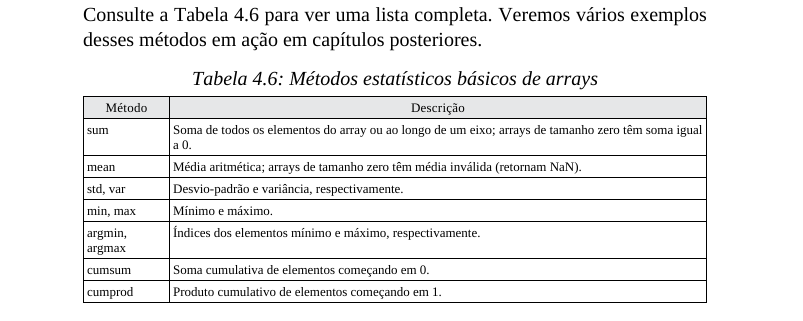

#### Métodos para arrays booleanos

In [46]:
arr = rng.standard_normal(100)
(arr > 0).sum() # Número de valores positivos

np.int64(49)

In [47]:
(arr < 0).sum()

np.int64(51)

Dois métodos adicionais, any e all, são úteis principalmente para arrays
booleanos. any verifica se um ou mais valores de um array são True, enquanto
all verifica se todos os valores são True:

In [49]:
bools = np.array([False, False, True, False])

In [50]:
bools.any()

np.True_

In [51]:
bools.all()

np.False_

#### Ordenação

In [53]:
arr =  rng.standard_normal(6)
arr

array([-0.57781189,  0.92300911, -1.62854872,  0.66764794,  0.07693315,
        1.14102823])

In [56]:
arr.sort()
arr

array([-1.62854872, -0.57781189,  0.07693315,  0.66764794,  0.92300911,
        1.14102823])

Você pode ordenar cada seção unidimensional de valores de um array
multidimensional ao longo do eixo passando o número deste para sort. Nestes
exemplos de dados:

In [57]:
arrx = rng.standard_normal((5, 3))
arrx

array([[ 1.38521786,  1.36196527, -0.00347519],
       [-0.87918084,  1.44886095, -1.05149593],
       [ 0.27873092, -0.49722914,  0.1785572 ],
       [ 1.93463405,  0.63352451,  0.36368982],
       [-0.05244324,  0.39548381,  0.83665788]])

In [60]:
arrx.sort(axis=0)
arrx

array([[-0.87918084, -0.49722914, -1.05149593],
       [-0.05244324,  0.39548381, -0.00347519],
       [ 0.27873092,  0.63352451,  0.1785572 ],
       [ 1.38521786,  1.36196527,  0.36368982],
       [ 1.93463405,  1.44886095,  0.83665788]])

In [63]:
arrx.sort(axis=1)
arrx

array([[-1.05149593, -0.87918084, -0.49722914],
       [-0.05244324, -0.00347519,  0.39548381],
       [ 0.1785572 ,  0.27873092,  0.63352451],
       [ 0.36368982,  1.36196527,  1.38521786],
       [ 0.83665788,  1.44886095,  1.93463405]])

O método de nível superior numpy.sort retorna uma cópia ordenada de um array
(como a função sorted interna do Python) em vez de modificá-lo diretamente
no local. Por exemplo:

In [64]:
arr2 = np.array([5, -10, 7, 1, 0, -3])

sorted_arr2 = np.sort(arr2)

sorted_arr2

array([-10,  -3,   0,   1,   5,   7])

In [65]:
arr2

array([  5, -10,   7,   1,   0,  -3])

#### Unicidade e outras lógicas de conjuntos

O NumPy tem algumas operações básicas de conjuntos para ndarrays
unidimensionais. Uma que é muito usada é numpy.unique, que retorna os valores
únicos ordenados de um array:

In [66]:
names = np.array(["Bob", "Will", "Joe", "Bob", "Will", "Joe", "Joe"])

np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [67]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])

np.unique(ints)

array([1, 2, 3, 4])